In [75]:
from kervis.utils import Model
from kervis.utils import Dataset
from kervis.kernels import VertexHistogram, EdgeHistogram, ShortestPath, Graphlet, WeisfeilerLehman

In [76]:
example = Dataset("example",cmap="Set3", from_TUDataset=False)

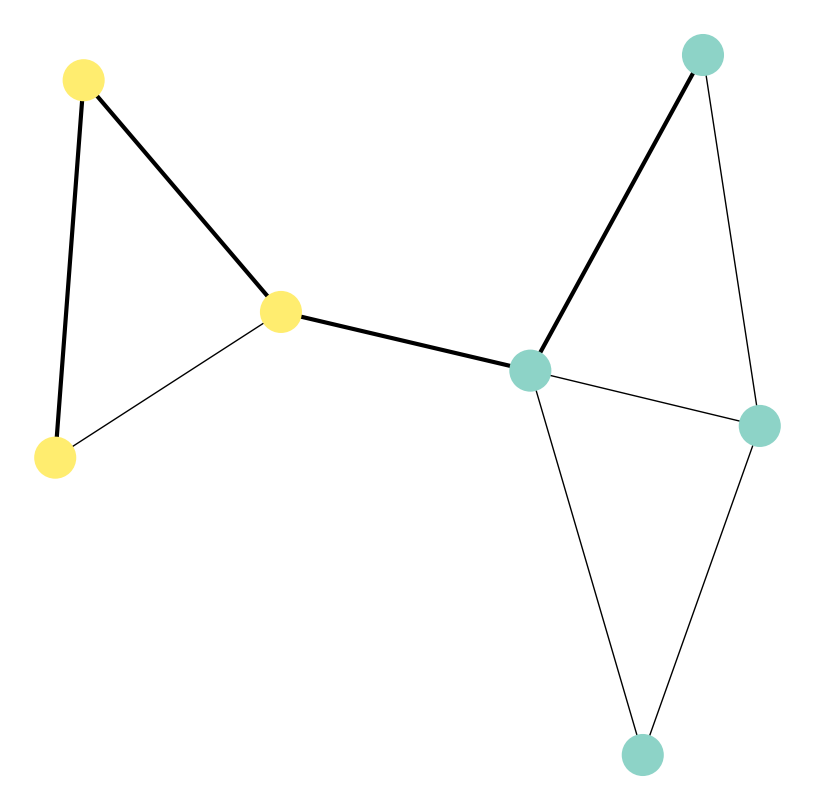

In [77]:
example.plot_graph(0, node_size=200)

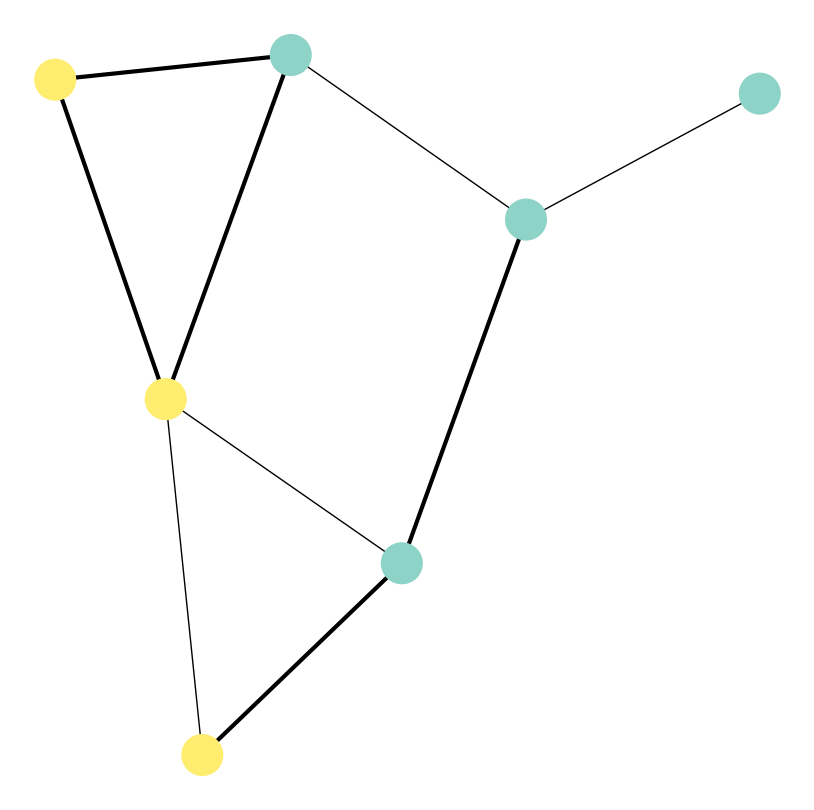

In [78]:
example.plot_graph(1, node_size=200)

In [79]:
example.node_color_map

{0: (0.5529411764705883, 0.8274509803921568, 0.7803921568627451, 1.0),
 1: (1.0, 0.9294117647058824, 0.43529411764705883, 1.0)}

In [80]:
VH = VertexHistogram()
EH = EdgeHistogram()
SP = ShortestPath()
GL = Graphlet(k=4)

In [81]:
VH_example = Model(VH, example, "SVM", test_size=0.1)
VH_example.explain()

EH_example = Model(EH, example, "SVM", test_size=0.1)
EH_example.explain()

SP_example = Model(SP, example, "SVM", test_size=0.1)
SP_example.explain()

GL_example = Model(GL, example, "SVM", test_size=0.1)
GL_example.explain()

In [82]:
print(VH_example.kernel.attributes)
print(VH_example.kernel.X[0])
print(VH_example.kernel.X[1])

[0, 1]
[4. 3.]
[4. 3.]


In [83]:
print(EH_example.kernel.attributes)
print(EH_example.kernel.X[0])
print(EH_example.kernel.X[1])

[0, 1]
[5. 4.]
[4. 5.]


In [84]:
print(SP_example.kernel.attributes)
print(SP_example.kernel.X[0])
print(SP_example.kernel.X[1])

[(1, 0, 1), (0, 1, 3), (1, 1, 2), (0, 0, 2), (0, 1, 2), (0, 0, 1), (1, 1, 1), (0, 1, 1)]
[0. 6. 0. 1. 5. 5. 3. 1.]
[0. 3. 1. 3. 5. 3. 2. 4.]


In [91]:
print(sum(a*b for a,b in zip(SP_example.kernel.X[0], SP_example.kernel.X[1])))

71.0


In [85]:
# GL_example.kernel.plot_all_graphlet(80)

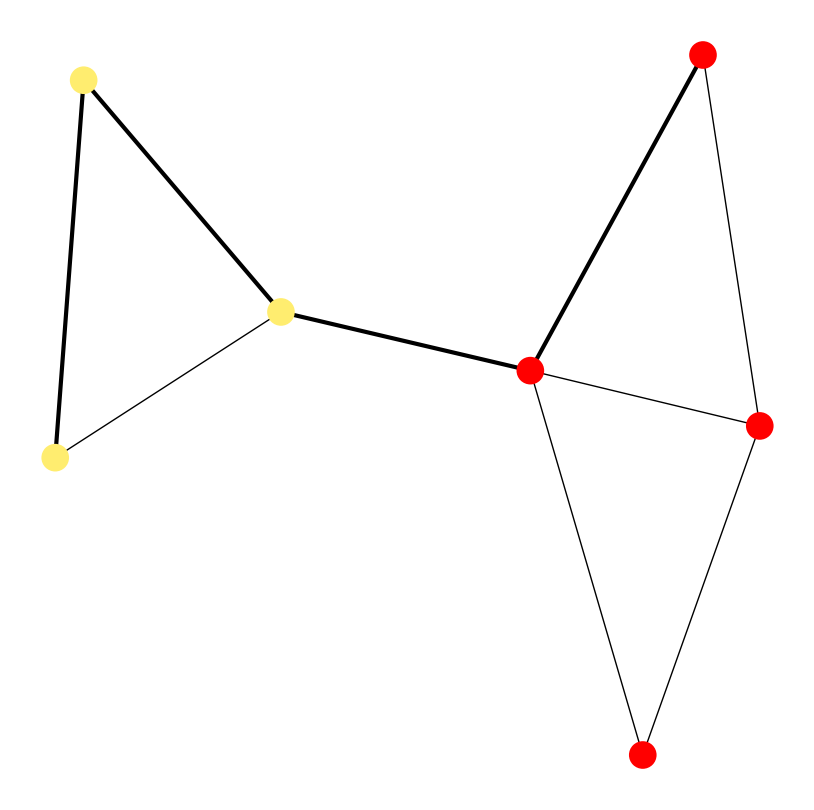

In [86]:
VH_example.highlight_features(0, 0)

In [87]:
GL_example.find_features(0, 0)

[(2, 3, 4, 5)]

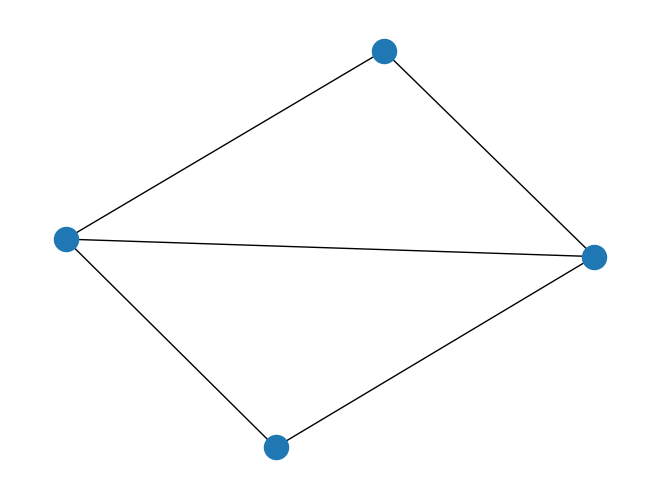

In [88]:
import networkx as nx
nx.draw(GL_example.dataset.G.subgraph((1, 2, 3, 4)))